# Understanding Fingerprints for Machine Learning
 
<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/05_ex/fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

## Introduction

Fingerprints are numerical representations of objects that capture their essential characteristics. In machine learning, they allow us to:

1. Convert complex data (text, molecules, images) into vectors for ML algorithms
2. Quantify similarity between objects
3. Perform efficient searching and clustering

In this tutorial, we'll explore fingerprinting techniques for:
- Text data
- Chemical structures

We'll learn how to create fingerprints and measure similarity between them.

## 1. Text Fingerprinting

### One-hot Encoding for Words

One-hot encoding is a simple representation technique that creates a binary vector for each word in a vocabulary. Each position in the vector corresponds to a unique word, with a 1 at the position corresponding to the current word and 0s elsewhere.

This is particularly useful for:
- Converting categorical data to numerical form
- Representing words in a vector space
- Building simple bag-of-words models

In [24]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a simple sentence
sentence = ["A", "horse", ",", "rabbit", ",", "and", "giraffe"]

# Create a DataFrame with the words
df = pd.DataFrame(sentence, columns=["word"])
print("Original sentence as DataFrame:")
display(df)

# Method 1: Using sklearn's OneHotEncoder
print("\nMethod 1: Using sklearn's OneHotEncoder")
enc = OneHotEncoder()
encoding = enc.fit_transform(df).toarray()  # Convert sparse matrix to dense array
df_ohe = pd.DataFrame(encoding, index=sentence)
print("One-hot encoded matrix (rows=words, columns=unique positions):")
display(df_ohe)

# Method 2: Using pandas get_dummies
print("\nMethod 2: Using pandas get_dummies")
df_dummies = pd.get_dummies(df, columns=["word"])
print("One-hot encoded with pandas (each column represents a word):")
display(df_dummies)

# Explanation of what happened
print("\nExplanation:")
print(f"- Our vocabulary has {len(np.unique(sentence))} unique tokens")
print(f"- Each word is encoded as a vector of length {df_ohe.shape[1]}")
print("- Only one position has value 1.0, all others are 0.0")
print("- This creates a sparse representation ideal for text processing")

Original sentence as DataFrame:


,word
0,A
1,horse
2,","
3,rabbit
4,","
5,and
6,giraffe



Method 1: Using sklearn's OneHotEncoder
One-hot encoded matrix (rows=words, columns=unique positions):


,0,1,2,3,4,5
A,0.0,1.0,0.0,0.0,0.0,0.0
horse,0.0,0.0,0.0,0.0,1.0,0.0
",",1.0,0.0,0.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,0.0,1.0
",",1.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,1.0,0.0,0.0,0.0
giraffe,0.0,0.0,0.0,1.0,0.0,0.0



Method 2: Using pandas get_dummies
One-hot encoded with pandas (each column represents a word):


,"word_,",word_A,word_and,word_giraffe,word_horse,word_rabbit
0,False,True,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,True,False,False,False,False,False
5,False,False,True,False,False,False
6,False,False,False,True,False,False



Explanation:
- Our vocabulary has 6 unique tokens
- Each word is encoded as a vector of length 6
- Only one position has value 1.0, all others are 0.0
- This creates a sparse representation ideal for text processing


## Exercise 1: One-hot Encoding a Sentence

Let's apply what we've learned to encode a German sentence:

**Task**: 
1. Encode the German sentence "Meine Oma fährt im Hühnerstall Motorrad"
2. Write the sentence by concatenating the fingerprint vectors into a single 1D vector

**Expected result**: A vector with many zeros and only a few ones, looking like:
```
[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0.]
```

**Hints**:
- Split the sentence into a list of words
- Use OneHotEncoder to encode each word
- Concatenate the resulting vectors

Words in sentence: ['Meine', 'Oma', 'fährt', 'im', 'Hühnerstall', 'Motorrad']

One-hot encodings for each word:


,0,1,2,3,4,5
Meine,0.0,1.0,0.0,0.0,0.0,0.0
Oma,0.0,0.0,0.0,1.0,0.0,0.0
fährt,0.0,0.0,0.0,0.0,1.0,0.0
im,0.0,0.0,0.0,0.0,0.0,1.0
Hühnerstall,1.0,0.0,0.0,0.0,0.0,0.0
Motorrad,0.0,0.0,1.0,0.0,0.0,0.0



Concatenated vector shape: (36,)

Concatenated vector (representing the entire sentence):
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 2. Measuring Similarity Between Fingerprints

Once we have fingerprints, we often want to measure how similar they are. **Cosine similarity** is one of the most popular metrics for this purpose, especially for sparse vectors like one-hot encodings.

### Cosine Similarity

Cosine similarity measures the cosine of the angle between two vectors, ignoring their magnitude:

$\text{similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}||\mathbf{B}|}$

- Values range from 0 (completely opposite) to 1 (identical)
- For binary vectors, it measures the overlap between vectors
- Particularly effective for sparse high-dimensional data

Cosine similarity between words (1.0 = identical, 0.0 = completely different):


,A,horse,",",rabbit,",",and,giraffe
A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
horse,0.0,1.0,0.0,0.0,0.0,0.0,0.0
",",0.0,0.0,1.0,0.0,1.0,0.0,0.0
rabbit,0.0,0.0,0.0,1.0,0.0,0.0,0.0
",",0.0,0.0,1.0,0.0,1.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,1.0,0.0
giraffe,0.0,0.0,0.0,0.0,0.0,0.0,1.0


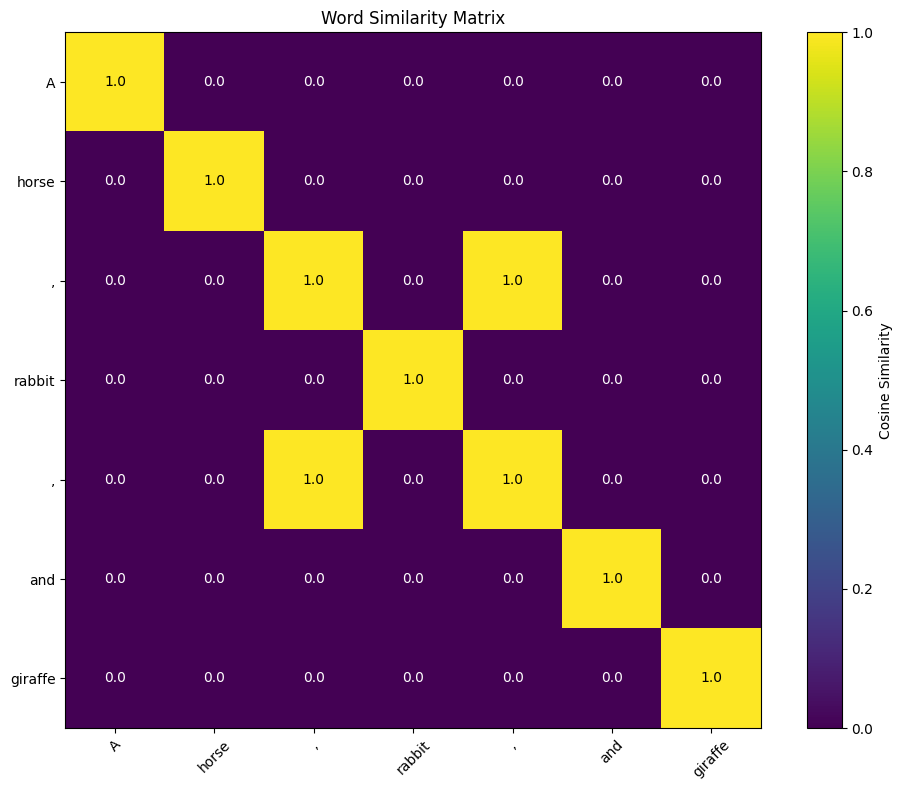


Observations:
- Words have similarity 1.0 with themselves (diagonal)
- The two commas have similarity 1.0 with each other (they're identical)
- All other word pairs have zero similarity (no shared features)
- This is expected with one-hot encoding as each word is orthogonal to others


## 3. Character-based Fingerprinting

One-hot encoding treats each word as an atomic unit. Another approach is to characterize words by the letters they contain.

### Letter Count Fingerprinting

This approach:
- Counts the frequency of each letter in a word
- Creates a dictionary with letters as keys and counts as values
- Provides a more nuanced representation than one-hot encoding
- Can capture similarity between words with similar character distributions

Character frequency fingerprints:
1. horse: {'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1}
2. rabbit: {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1}
3. giraffe: {'g': 1, 'i': 1, 'r': 1, 'a': 1, 'f': 2, 'e': 1}
4. horse: {'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1}
5. rabbit: {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1}


## 4. Chemical Structure Fingerprints

Fingerprints are especially important in cheminformatics and materials science. They allow us to:
- Represent complex molecular structures as numerical vectors
- Quantify structural similarity between molecules
- Build predictive models for material properties

For polymers, we'll use the `psmiles` package to generate fingerprints from polymer SMILES (Simplified Molecular Input Line Entry System) strings.

### Polymer SMILES (PSMILES)

PSMILES is an extension of the SMILES notation for representing polymers. Special markers (asterisks) are used to indicate connection points between monomers.

C(c1ccccc1)(C[*])[*]


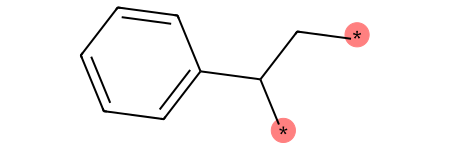

[*]CC[*]


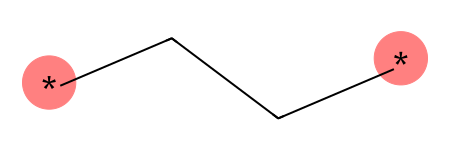

[*]CCCCCCC(CCCCC[*])c1ccccc1


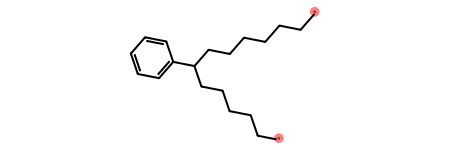

In [50]:
# First, we'll need to install the psmiles package if we're on Colab
# Uncomment the line below if running in Colab
# !pip install 'psmiles[polyBERT]@git+https://github.com/Ramprasad-Group/psmiles.git'

# Import the PolymerSmiles class
from psmiles import PolymerSmiles

# Define PSMILES strings for common polymers
# * symbols indicate connection points between monomers
ps = "C(c1ccccc1)(C[*])[*]"  # Polystyrene
pe = "[*]CC[*]"  # Polyethylene

# Create PolymerSmiles objects
ps_obj = PolymerSmiles(ps)
pe_obj = PolymerSmiles(pe)
display(ps_obj)
display(pe_obj)


# Generate a linear copolymer combining polystyrene (A) and polyethylene (B)
# The pattern ABBBBB indicates the sequence of monomers
copolymer = ps_obj.linear_copolymer(pe_obj, "ABBBBB")
copolymer

In [57]:
# Generate fingerprint for polystyrene
ps_fingerprint = ps_obj.fingerprint()

# Examine the fingerprint
print(f"Fingerprint for polystyrene: {ps_fingerprint}")
print(f"Type of fingerprint: {type(ps_fingerprint)}")
print(f"Length of fingerprint: {len(ps_fingerprint)}")
print(f"Number of non-zero elements: {np.count_nonzero(ps_fingerprint)}")
print(
    f"Sparsity: {100 * (1 - np.count_nonzero(ps_fingerprint) / len(ps_fingerprint)):.2f}%"
)

Fingerprint for polystyrene: [0 1 0 ... 0 0 0]
Type of fingerprint: <class 'numpy.ndarray'>
Length of fingerprint: 2048
Number of non-zero elements: 23
Sparsity: 98.88%


## Exercise 2: Computing Polymer Fingerprints

Now let's apply what we've learned to generate fingerprints for a set of simple polymers.

**Task**: 
- Compute fingerprints for all the polymers in the list
- Store the fingerprints in a `fp_list` and a DataFrame along with the PSMILES strings

In [ ]:
# List of polymer SMILES strings
psmiles_strings = [
    "*CC*",  # Polyethylene
    "*CCO*",  # Polyethylene oxide
    "*CC(C)*",  # Polypropylene
    "*CC(CC)*",  # Polybutylene
]

# Create an empty list to store the fingerprints
fp_list = []



- *CC*: fingerprint length = 2048, non-zero elements = 4
- *CCO*: fingerprint length = 2048, non-zero elements = 8
- *CC(C)*: fingerprint length = 2048, non-zero elements = 10
- *CC(CC)*: fingerprint length = 2048, non-zero elements = 13

Polymer fingerprints:


,PSMILES,fingerprint
0,*CC*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,*CCO*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,*CC(C)*,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,*CC(CC)*,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Fingerprint statistics:


,PSMILES,active_features,total_features,sparsity
0,*CC*,4,2048,99.804688
1,*CCO*,8,2048,99.609375
2,*CC(C)*,10,2048,99.511719
3,*CC(CC)*,13,2048,99.365234


## 5. Measuring Polymer Similarity

Now that we have fingerprints for our polymers, we can measure how similar they are to each other. We'll use two common distance metrics:

1. **Cosine distance**: Measures the angle between vectors, regardless of magnitude
2. **Euclidean distance**: Measures the straight-line distance between vectors

The choice of distance metric depends on your application and the nature of your fingerprints.

Cosine distance matrix (0 = identical, 1 = completely different):


,*CC*,*CCO*,*CC(C)*,*CC(CC)*
*CC*,0.000000,0.340620,0.386059,4.196190e-01
*CCO*,0.340620,0.000000,0.537348,5.216351e-01
*CC(C)*,0.386059,0.537348,0.000000,3.000868e-01
*CC(CC)*,0.419619,0.521635,0.300087,4.440892e-16


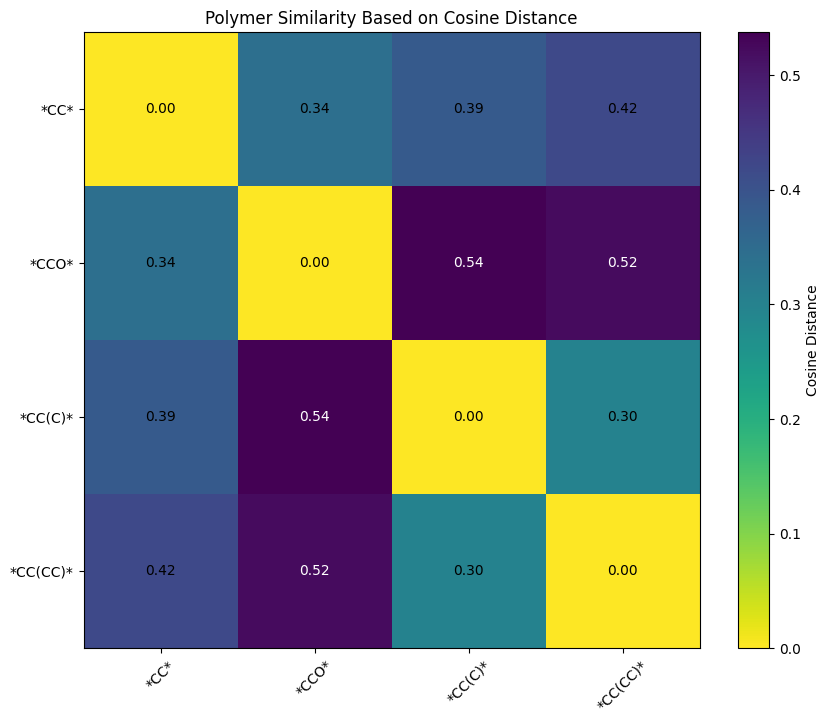

In [69]:
# Using sklearn's pairwise_distances to compute similarity/distance matrices
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Compute cosine distance matrix
# Cosine distance = 1 - cosine similarity
# Lower values indicate more similar polymers
cosine_distances = pairwise_distances(fp_list, metric="cosine")
cosine_df = pd.DataFrame(
    cosine_distances, columns=psmiles_strings, index=psmiles_strings
)

print("Cosine distance matrix (0 = identical, 1 = completely different):")
display(cosine_df)

# Create a heatmap of cosine distances
plt.figure(figsize=(10, 8))
plt.imshow(
    cosine_distances, cmap="viridis_r"
)  # Reversed colormap so darker = more similar
plt.colorbar(label="Cosine Distance")
plt.xticks(range(len(psmiles_strings)), psmiles_strings, rotation=45)
plt.yticks(range(len(psmiles_strings)), psmiles_strings)
plt.title("Polymer Similarity Based on Cosine Distance")

# Add text annotations
for i in range(len(psmiles_strings)):
    for j in range(len(psmiles_strings)):
        plt.text(
            j,
            i,
            f"{cosine_distances[i, j]:.2f}",
            ha="center",
            va="center",
            color="white" if cosine_distances[i, j] > 0.5 else "black",
        )

Euclidean distance matrix:


,*CC*,*CCO*,*CC(C)*,*CC(CC)*
*CC*,0.000000,3.605551,3.000000,3.605551
*CCO*,3.605551,0.000000,4.472136,4.690416
*CC(C)*,3.000000,4.472136,0.000000,3.162278
*CC(CC)*,3.605551,4.690416,3.162278,0.000000


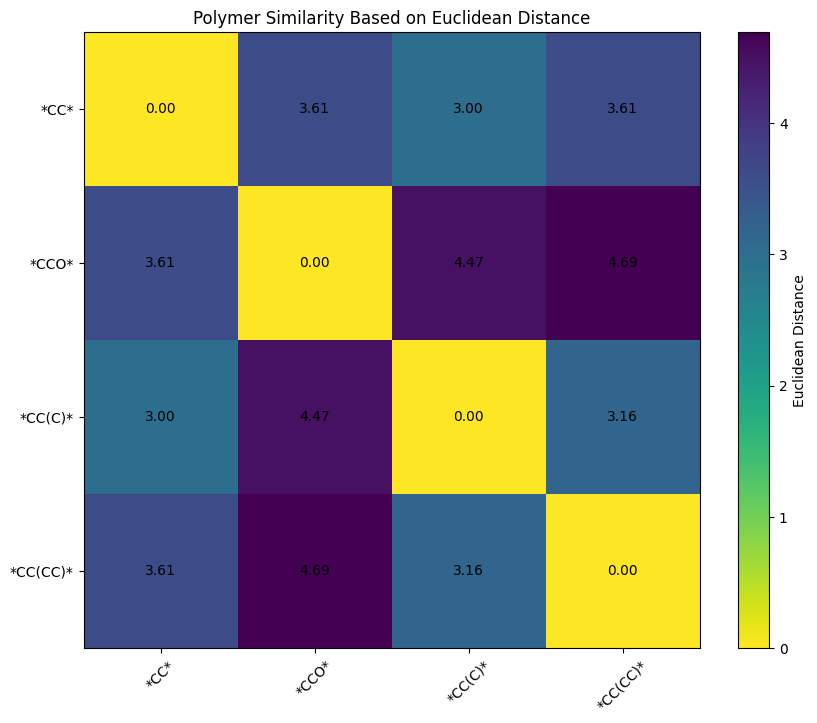

In [68]:
# Compute Euclidean distance matrix
euclidean_distances = pairwise_distances(fp_list, metric="euclidean")
euclidean_df = pd.DataFrame(
    euclidean_distances, columns=psmiles_strings, index=psmiles_strings
)

print("Euclidean distance matrix:")
display(euclidean_df)

# Create a heatmap of Euclidean distances
plt.figure(figsize=(10, 8))
plt.imshow(euclidean_distances, cmap="viridis_r")  # Reversed colormap
plt.colorbar(label="Euclidean Distance")
plt.xticks(range(len(psmiles_strings)), psmiles_strings, rotation=45)
plt.yticks(range(len(psmiles_strings)), psmiles_strings)
plt.title("Polymer Similarity Based on Euclidean Distance")

# Add text annotations
for i in range(len(psmiles_strings)):
    for j in range(len(psmiles_strings)):
        plt.text(
            j,
            i,
            f"{euclidean_distances[i, j]:.2f}",
            ha="center",
            va="center",
            color="white" if euclidean_distances[i, j] > 5 else "black",
        )

## Exercise 3: Creating One-Hot Encoded Fingerprints for PSMILES

Let's create an alternative fingerprinting approach for our polymer SMILES strings.

**Task**: 
- Create one-hot encoded fingerprints for the PSMILES strings
- Instead of using the built-in fingerprinting method, we'll treat each character in the SMILES string as a feature

**Hints**:
- Split each PSMILES string into characters
- Use OneHotEncoder or a similar approach to encode each character

This exercise demonstrates an alternative, much simpler approach to molecular fingerprinting that doesn't require domain knowledge but captures some basic string similarity.

All unique characters in the PSMILES strings: ['(', ')', '*', 'C', 'O']

Character frequency fingerprints:


,(,),*,C,O
*CC*,0,0,2,2,0
*CCO*,0,0,2,2,1
*CC(C)*,1,1,2,3,0
*CC(CC)*,1,1,2,4,0



Cosine similarity based on character distribution:


,*CC*,*CCO*,*CC(C)*,*CC(CC)*
*CC*,1.000000,0.942809,0.912871,0.904534
*CCO*,0.942809,1.000000,0.860663,0.852803
*CC(C)*,0.912871,0.860663,1.000000,0.990867
*CC(CC)*,0.904534,0.852803,0.990867,1.000000


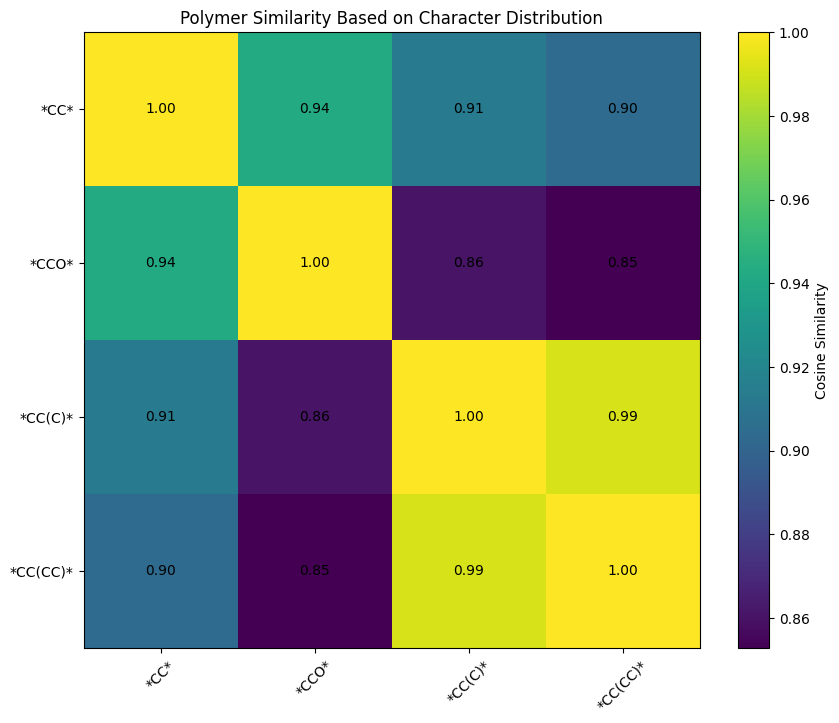